In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf
from matplotlib.figure import Figure
import plotly.graph_objects as go
from scipy.optimize import minimize

## Aquí vamos a bajar de yahoo finance la serie histórica de 10 activos

In [2]:
# Next we will get the stock tickers and the price data.

ticker = ['JPM', 'AAPL', 'WMT', 'TGT', 'MSFT', 'AMZN', 'META','JNJ', 'PG', 'DIS']
price_data = yf.download(ticker,
                         start='2014-01-01',
                         end='2023-05-31')['Adj Close']
                         
price_data.tail()

[*********************100%%**********************]  10 of 10 completed


,AAPL,AMZN,DIS,JNJ,JPM,META,MSFT,PG,TGT,WMT
Date,,,,,,,,,,
2023-05-23,171.328644,114.989998,89.820000,155.679688,134.664673,246.740005,314.593933,145.706512,145.909225,147.784622
2023-05-24,171.608261,116.750000,89.070000,155.530777,133.432297,249.210007,313.186920,144.501755,141.883743,147.107040
2023-05-25,172.756714,115.000000,88.139999,153.296997,133.757660,252.690002,325.231415,143.573486,139.553711,145.642258
2023-05-26,175.193420,120.110001,88.290001,153.237427,135.009750,262.040009,332.186707,143.583359,137.749161,145.901321
2023-05-30,177.060898,121.660004,87.820000,153.257263,135.522415,262.519989,330.510223,141.391098,132.702438,145.542603


In [3]:
returns_data = price_data.pct_change(1)

returns_data.dropna(inplace=True)
returns_data.head()

,AAPL,AMZN,DIS,JNJ,JPM,META,MSFT,PG,TGT,WMT
Date,,,,,,,,,,
2014-01-03,-0.021966,-0.003845,-0.002098,0.009008,0.007731,-0.002742,-0.006727,-0.001118,0.004907,-0.003295
2014-01-06,0.005453,-0.007088,-0.003810,0.005226,0.005796,0.048387,-0.021132,0.002362,-0.006773,-0.005595
2014-01-07,-0.007152,0.011178,0.006858,0.021228,-0.011525,0.012587,0.007749,0.009673,-0.002379,0.003069
2014-01-08,0.006333,0.009773,-0.014671,-0.001378,0.009431,0.005352,-0.017852,-0.014493,-0.003497,-0.007903
2014-01-09,-0.012770,-0.002264,-0.004254,0.006053,-0.001869,-0.017345,-0.006432,0.002243,0.010369,0.003341


In [4]:
mean_returns = returns_data.mean()
mean_returns

AAPL    0.001148
AMZN    0.000985
DIS     0.000243
JNJ     0.000397
JPM     0.000622
META    0.000952
MSFT    0.001144
PG      0.000427
TGT     0.000612
WMT     0.000435
dtype: float64

In [5]:
mat_var_covar = returns_data.cov()
mat_var_covar

,AAPL,AMZN,DIS,JNJ,JPM,META,MSFT,PG,TGT,WMT
AAPL,0.000331,0.000210,0.000140,0.000079,0.000140,0.000230,0.000212,0.000083,0.000117,0.000080
AMZN,0.000210,0.000442,0.000142,0.000064,0.000112,0.000291,0.000227,0.000061,0.000120,0.000072
DIS,0.000140,0.000142,0.000298,0.000067,0.000171,0.000163,0.000141,0.000068,0.000108,0.000061
JNJ,0.000079,0.000064,0.000067,0.000130,0.000083,0.000072,0.000084,0.000074,0.000062,0.000059
JPM,0.000140,0.000112,0.000171,0.000083,0.000300,0.000141,0.000140,0.000074,0.000108,0.000063
META,0.000230,0.000291,0.000163,0.000072,0.000141,0.000570,0.000233,0.000068,0.000117,0.000064
MSFT,0.000212,0.000227,0.000141,0.000084,0.000140,0.000233,0.000297,0.000090,0.000114,0.000082
PG,0.000083,0.000061,0.000068,0.000074,0.000074,0.000068,0.000090,0.000135,0.000074,0.000072
TGT,0.000117,0.000120,0.000108,0.000062,0.000108,0.000117,0.000114,0.000074,0.000362,0.000116
WMT,0.000080,0.000072,0.000061,0.000059,0.000063,0.000064,0.000082,0.000072,0.000116,0.000175


In [6]:
summary_stats = returns_data.describe()
summary_stats

,AAPL,AMZN,DIS,JNJ,JPM,META,MSFT,PG,TGT,WMT
count,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000
mean,0.001148,0.000985,0.000243,0.000397,0.000622,0.000952,0.001144,0.000427,0.000612,0.000435
std,0.018201,0.021015,0.017261,0.011393,0.017318,0.023877,0.017248,0.011620,0.019031,0.013243
min,-0.128647,-0.140494,-0.131632,-0.100379,-0.149649,-0.263901,-0.147390,-0.087373,-0.249303,-0.113757
25%,-0.007225,-0.008626,-0.007038,-0.004825,-0.007403,-0.009477,-0.006667,-0.004815,-0.007520,-0.005575
50%,0.000905,0.001105,0.000197,0.000308,0.000391,0.001020,0.000785,0.000576,0.000819,0.000437
75%,0.010347,0.011161,0.007786,0.006011,0.008603,0.012109,0.009846,0.006003,0.009068,0.006539
max,0.119809,0.141311,0.144123,0.079977,0.180125,0.232824,0.142169,0.120090,0.204256,0.117085


In [7]:
std_dev_stocks = summary_stats.loc['std']*np.sqrt(252)
std_dev_stocks

AAPL    0.288930
AMZN    0.333608
DIS     0.274015
JNJ     0.180854
JPM     0.274922
META    0.379037
MSFT    0.273798
PG      0.184462
TGT     0.302109
WMT     0.210224
Name: std, dtype: float64

## Aquí vamos a partir de un equally weighted portfolio, es decir, le asignamos el mismo peso a todos los activos.

In [8]:
number_of_stocks = len(mean_returns)
print(f'Number of Stocks: {number_of_stocks}')

Number of Stocks: 10


In [9]:
weights = [1 / number_of_stocks]*number_of_stocks
weights

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [10]:
return_portfolio_annual = np.dot(weights, mean_returns)*252
return_portfolio_annual

0.17551012593498114

In [11]:
var_portfolio_annual = np.dot(weights, np.dot(mat_var_covar, np.transpose(weights)))*252
var_portfolio_annual

0.03362134133144719

In [12]:
min_return = mean_returns.min()
max_return = mean_returns.max()
step_returns = (max_return - min_return) / 20
print(f'min return: {min_return}, max return = {max_return}, step = {step_returns}')

min return: 0.00024337143578094598, max return = 0.0011477017245370778, step = 4.521651443780659e-05


## Ahora vamos a calcular los pesos óptimos para cada retorno esperado, de tal manera que se minimice la varianza del portafolio

In [13]:
def getPortRisk(weights):
    returns_data = price_data.pct_change(1).dropna()
    num_stocks = len(returns_data.columns)
    var_covar_matrix = returns_data.cov()
    var_port = np.dot(np.transpose(weights), np.dot(var_covar_matrix, weights))
    sd_port = np.sqrt(var_port)
    sd_port_annual = sd_port * np.sqrt(252)
    return sd_port_annual

In [14]:
num_stocks = len(price_data.columns)
init_weights = [1 / num_stocks] * num_stocks

bounds = tuple((0, 1) for i in range(num_stocks))

optimal_w = [ ]

sd_eff_front = []

r_eff_front = np.linspace(min_return, max_return, num=100) * 252

for target_return in np.linspace(min_return, max_return, num=100):
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.dot(mean_returns, x) - target_return})
    results = minimize(fun=getPortRisk, x0=init_weights, bounds=bounds, constraints=cons)
    optimal_w.append(results['x'])
    sd_eff_front.append(results['fun'])    

In [15]:
df = pd.DataFrame({
    'Annual Standard Deviation': sd_eff_front,
    'Annual Expected Returns': r_eff_front,
    'Optimal Weights': optimal_w
})

In [16]:
df.head()

,Annual Standard Deviation,Annual Expected Returns,Optimal Weights
0,0.274015,0.061330,"[2.5518363638651087e-16, 0.0, 0.99999999999690..."
1,0.261539,0.063632,"[1.0269562977782698e-15, 2.7755575615628914e-1..."
2,0.249496,0.065933,"[2.7755575615628914e-17, 1.3877787807814457e-1..."
3,0.237949,0.068235,"[0.0, 3.1559719889848815e-17, 0.82135379782195..."
4,0.226976,0.070537,"[0.0, 1.9172747761006584e-16, 0.76180506377331..."


## El siguiente paso es graficar la frontera eficiente

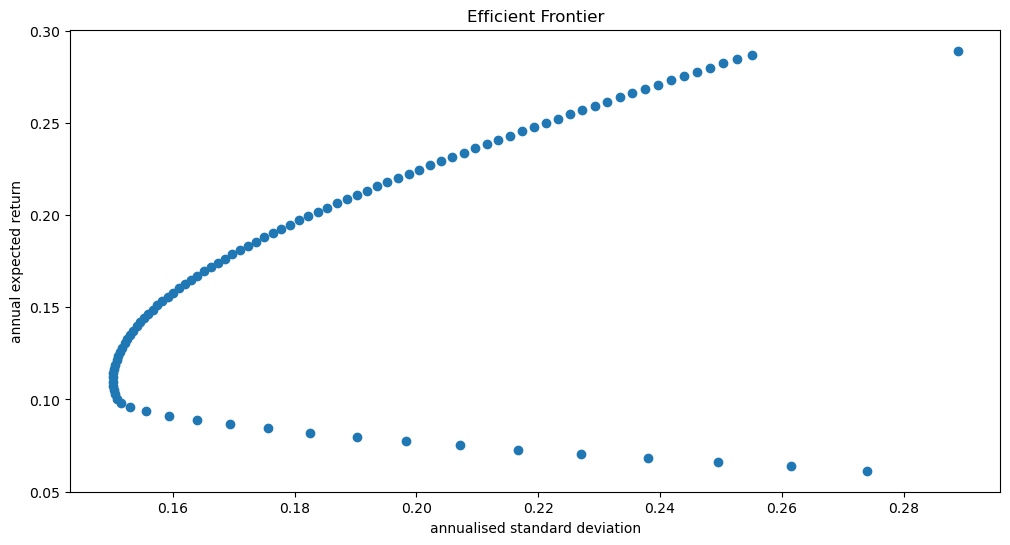

In [17]:
# Increase the size of the graph
plt.figure(figsize=(12, 6))

# Create a scatter plot using Matplotlib
plt.scatter(df['Annual Standard Deviation'], df['Annual Expected Returns'])

# Add labels and a title to the plot
plt.xlabel('annualised standard deviation')
plt.ylabel('annual expected return')
plt.title('Efficient Frontier')

# Show the plot
plt.show()

In [18]:
risk_free_rate = 0.04

def GetSharpeRatio(weights, mean_returns, var_covar_matrix, risk_free_rate):

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std_dev = np.sqrt(np.dot(np.transpose(weights), np.dot(var_covar_matrix, weights)))
    portfolio_std_dev_annual = portfolio_std_dev * np.sqrt(252)
    Sharpe_Ratio = (portfolio_return*252 - risk_free_rate) / portfolio_std_dev_annual
    return -Sharpe_Ratio # Minimize the negative Sharpe Ratio to maximize the Sharpe Ratio

cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

results2 = minimize(fun=GetSharpeRatio, x0=init_weights, args=(mean_returns, mat_var_covar, risk_free_rate),
                  method='SLSQP', bounds=bounds, constraints=cons)

optimal_weights = results2.x
optimal_sharpe_ratio = -GetSharpeRatio (optimal_weights, mean_returns, mat_var_covar, risk_free_rate)

print(f'Optimal Sharpe Ratio: {optimal_sharpe_ratio}')

optimal_weights = pd.DataFrame(optimal_weights)

optimal_weights.index = price_data.columns

optimal_weights.rename(columns={optimal_weights.columns[0] : 'Weights'}, inplace=True)

print()
print(optimal_weights)

Optimal Sharpe Ratio: 0.968205066530273

           Weights
AAPL  4.151216e-01
AMZN  0.000000e+00
DIS   2.992398e-17
JNJ   1.778092e-17
JPM   0.000000e+00
META  1.821460e-17
MSFT  5.687005e-01
PG    3.773024e-17
TGT   1.617793e-02
WMT   0.000000e+00


In [19]:
optimal_weights['Rounded Weights'] = optimal_weights['Weights'].apply(lambda x: round(x, 4))
optimal_weights

,Weights,Rounded Weights
AAPL,4.151216e-01,0.4151
AMZN,0.000000e+00,0.0000
DIS,2.992398e-17,0.0000
JNJ,1.778092e-17,0.0000
JPM,0.000000e+00,0.0000
META,1.821460e-17,0.0000
MSFT,5.687005e-01,0.5687
PG,3.773024e-17,0.0000
TGT,1.617793e-02,0.0162
WMT,0.000000e+00,0.0000


In [20]:
return_optimal_port = np.dot(optimal_weights['Rounded Weights'], mean_returns)*252
print(f'Expected Return of the Optimal Portfolio: {return_optimal_port}')

var_optimal_port = np.dot(optimal_weights['Rounded Weights'], np.dot(mat_var_covar, optimal_weights['Rounded Weights']))*252
desv_est_optimal_port = np.sqrt(var_optimal_port)
print(f'Standard Deviation of the Optimal Portfolio: {desv_est_optimal_port}')

Expected Return of the Optimal Portfolio: 0.28651680215676517
Standard Deviation of the Optimal Portfolio: 0.2546121760024338


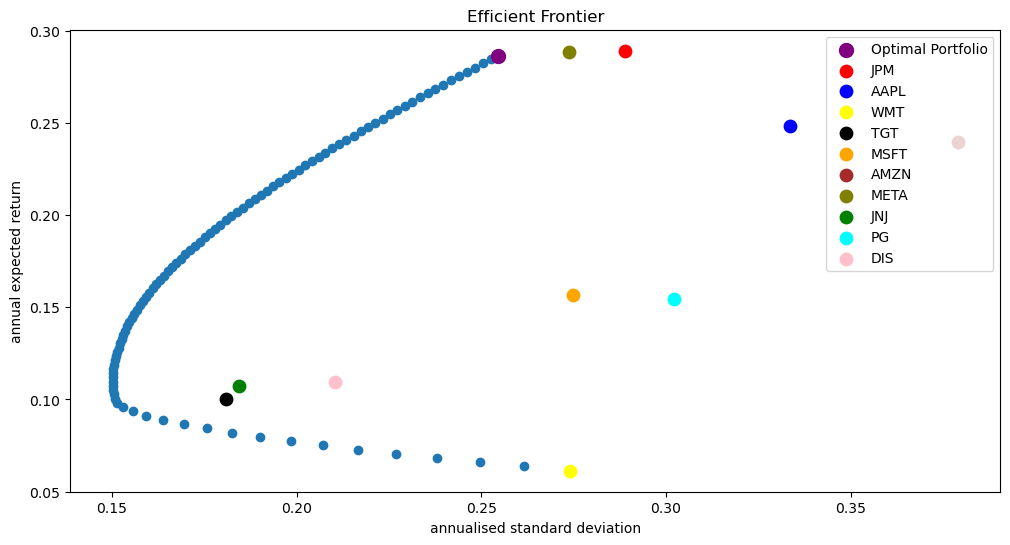

In [21]:
# Increase the size of the graph
plt.figure(figsize=(12, 6))

# Create a scatter plot using Matplotlib
colors = ['red', 'blue', 'yellow', 'black', 'orange', 'brown', 'olive', 'green', 'cyan', 'pink']
plt.scatter(df['Annual Standard Deviation'], df['Annual Expected Returns'])
plt.scatter(desv_est_optimal_port, return_optimal_port, s=100, label='Optimal Portfolio', c='purple')


labels = ticker

# Create a scatter plot with different labels for each point
for i in range(len(ticker)):
    plt.scatter(std_dev_stocks[i], mean_returns[i]*252, s=80, label=labels[i], c=colors[i])

# Add labels and a title to the plot
plt.xlabel('annualised standard deviation')
plt.ylabel('annual expected return')
plt.title('Efficient Frontier')

# show legends
legend = plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()